<h1>Project Forecasts and Predictions </h1> 

<h2>Goal of the project:</h2>
<h3>Main purpose of this project is to analyze Gym customers data in order to find out main reason for churn.

In addition, I need to divide all customers to groups and predict which one is more vulnerable and what can be improved in order to lower churn
.</h3>

<h2>Contents</h2>

[<font size="+1">Step 1. Downloading the data</font>](#Step_1)

[<font size="+1">Step 2. Exploratory data analysis</font>](#Step_2)

[<font size="+1">Step 3. Building a model to predict user churn </font>](#Step_3)

[<font size="+1">Step 4. Create user clusters</font>](#Step_4)

[<font size="+1">Step 5. General conclusion</font>](#Step_5) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

<a id='Step_1'></a>

In [22]:
#import csv file

try:
    data = pd.read_csv(r'C:\Users\andreyc\Desktop\projects\predictions\gym_churn_us.csv')
except:
    print('Issue during uploading files')


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
print(data.head())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [5]:
# checking for null values

print(data.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [6]:
# checking for null values for duplicated values

print(data.duplicated().sum())

0


<div class="alert alert-info"> <b>
Conclusion, reviewing the data.
    

I have received CSV file containing data on churn for a given month and information on the month preceding it.

Mentioned data contains all information information about customers that will be used in order to predict Churn.

I have one target value which his column Churn and 13 features.

During this step I imported all libraries that I will use further and verified that I have no duplicates or null values.


</div>

<h2>Step 2. Exploratory data analysis</h2>

<a id='Step_2'></a>

<h3> studying mean values of features </h3> 

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-info"> <b>
Conclusion, describe output.

I noticed that we have almost equal number of genders, partners/not partners and group visitors.

Most of customers located near to this Gym, avarege age is 28-30.

Also it seems we have about 20-30% of churn.

</div>

In [8]:
print(data.groupby('Churn').agg({'mean'}))

         gender Near_Location   Partner Promo_friends     Phone  \
           mean          mean      mean          mean      mean   
Churn                                                             
0      0.510037      0.873086  0.534195      0.353522  0.903709   
1      0.510839      0.768143  0.355325      0.183789  0.902922   

      Contract_period Group_visits        Age Avg_additional_charges_total  \
                 mean         mean       mean                         mean   
Churn                                                                        
0            5.747193     0.464103  29.976523                   158.445715   
1            1.728558     0.268615  26.989632                   115.082899   

      Month_to_end_contract  Lifetime Avg_class_frequency_total  \
                       mean      mean                      mean   
Churn                                                             
0                  5.283089  4.711807                  2.024876   
1    

<div class="alert alert-info"> <b>
Conclusion, mean values.
    
Now when I have groups of left customers and customers that still keep coming I can say following:
    
- Both genders can quit, there is no any difference.
- Customers that located far from Gym quit more.
- Customers with no partnership or group visitors quit more.
- Also it is clear that customers that spend more money will stay.

</div>

<h3>Plot bar histograms and feature distributions for those who left (churn) and those who stayed.</h3>

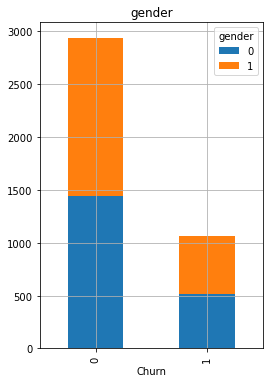

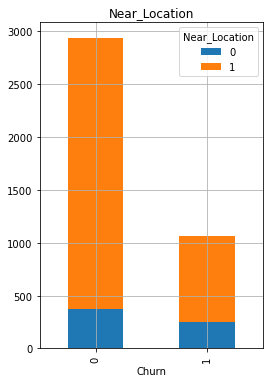

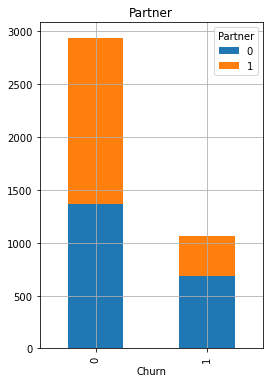

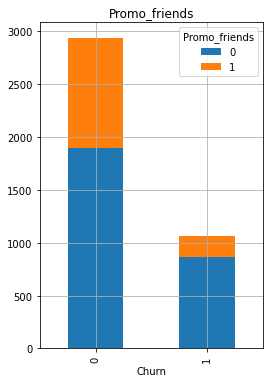

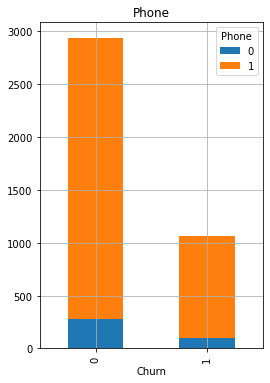

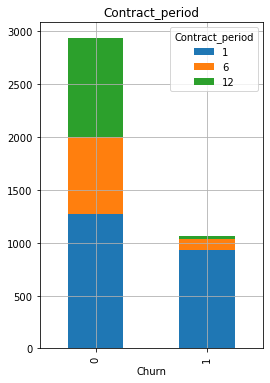

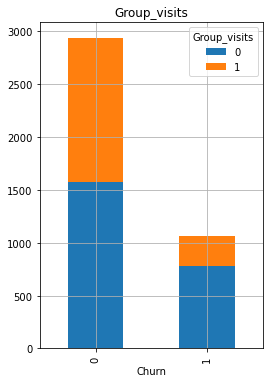

In [9]:
# Categorical variables

cat_val  = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']

for i in cat_val:
    data.groupby(['Churn', i]).size().unstack().plot(kind='bar',stacked=True, figsize=(4, 6), grid=True)
    plt.title(i)

<div class="alert alert-info"> <b>
Conclusion, Barplot

Barplot indeed confirms previous conslusion:
    
- No differences in gender
- With partnership people rather stay.
- Who left do not particiapte in group sessions.
- They boght 1 month pass.
- They were not invited by friends. 

</div>

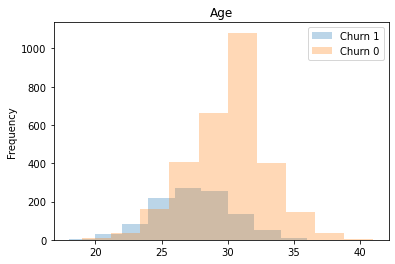

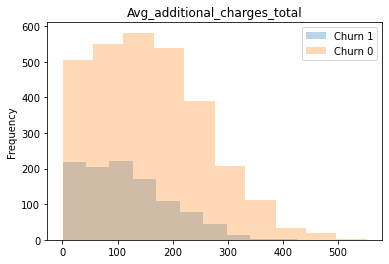

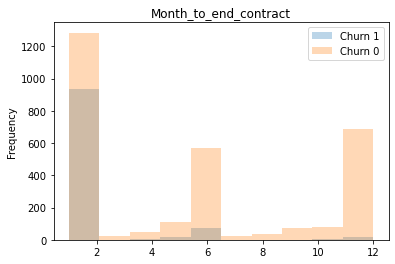

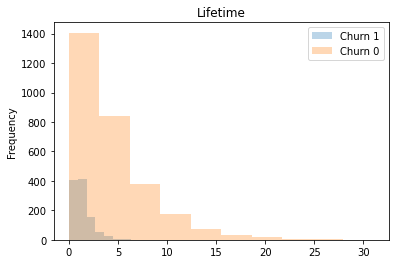

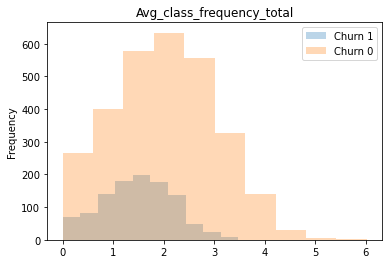

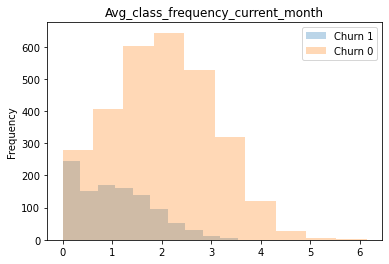

In [10]:
# numerical values

num_val = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i in num_val:
    data[data['Churn'] == 1][i].plot(kind='hist', alpha=0.3, label='Churn 1')
    data[data['Churn'] == 0][i].plot(kind='hist', alpha=0.3, label='Churn 0')
    plt.title(i)
    plt.legend()
    plt.show()
    

   

<div class="alert alert-info"> <b>
Conclusion, numerical values.
    
Based on histograms above I can conclude following:
    
- Average age of those who left is 25 and those who stay is 30.
- Who left spent less money on other gym services: cafe, athletic goods, cosmetics, massages, etc.
- Most of the people left after short period of time.
- Average frequency of visits per week for customers that left is smaller

</div>

<Figure size 2880x2880 with 0 Axes>

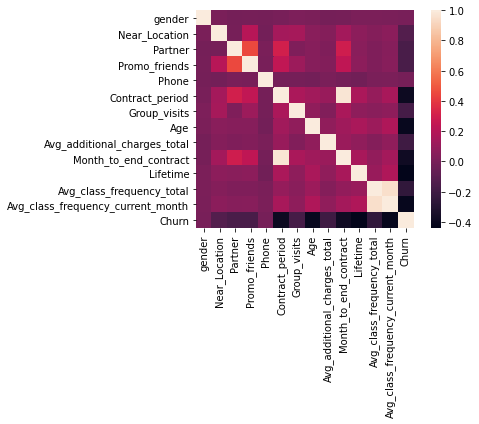

<Figure size 2880x2880 with 0 Axes>

In [23]:
corr_m = data.corr()

# plot a heatmap

sns.heatmap(corr_m, square = True)
plt.figure(figsize = (40,40))


<div class="alert alert-info"> <b>
Conclusion, heatmap.
    
Based on heatmap I can say that there is no obvious features that correlate with the target variable with an absolute value of more than 0.9

</div>

<h2> Step 3. Building a model to predict user churn </h2>

<a id='Step_3'></a>

In [12]:
# Logistic Regression

X = data.drop('Churn', axis = 1)
y = data['Churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define the model's algorithm 
model = LogisticRegression()

# train  model
model.fit(X_train_st, y_train)

# use the trained model to make forecasts
predictions = model.predict(X_test_st) 
#probabilities = model.predict_proba(X_test)


######

# random forest

rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)

In [24]:
# accuracy, precision, and recall for both models
print('Logistic Regression:')
print('')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions) ))

print('')
print('Random forest:')
print('')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions) ))

Logistic Regression:

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84

Random forest:

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


<div class="alert alert-info"> <b>
Conclusion, Building a model.

I used two models for predictions:
- Logistic regression
- Random forest

First of all I devided data (80 and 20%) for test and validation, also decided to normalize data.

Based on metrics (Accuracy, Precision, Recall and F1), I can say that there is no significant difference between Logistic regression and random forest.



</div>

<h2> Step 4. Create user clusters </h2>

<a id='Step_4'></a>

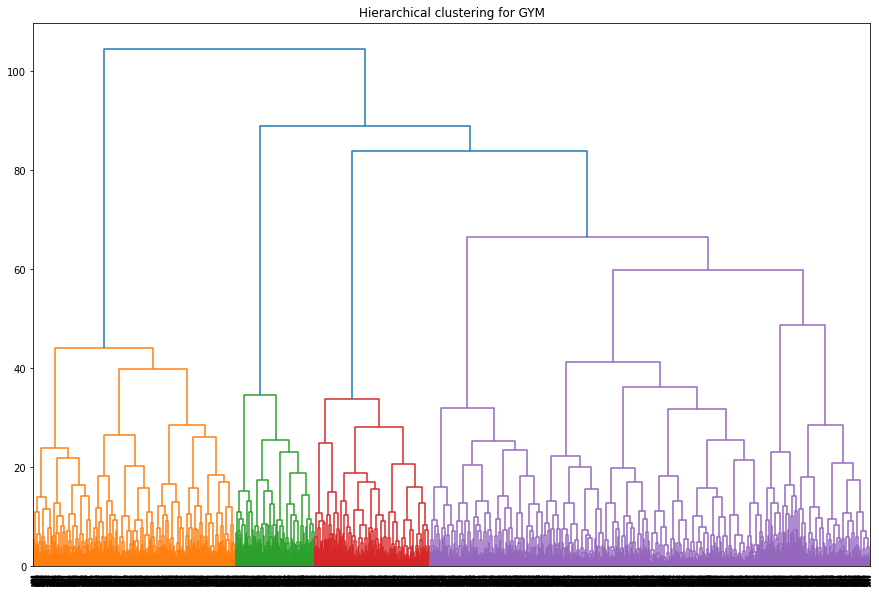

In [14]:
#  dendrogram / Agglomerative hierarchical clustering

sc = StandardScaler()
x_sc = sc.fit_transform(X)


linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

In [27]:
# K-means with predefined 5 clusters 

km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)
data['cluster_km'] = labels

<h3> Mean value for clusters </h3>

In [28]:


print(data.groupby('cluster_km').mean())

              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.522078       0.862338  0.470130       0.306494  0.000000   
1           0.480787       0.812559  0.000000       0.086223  1.000000   
2           0.559567       0.858002  0.338147       0.197353  0.998797   
3           0.509603       0.750320  1.000000       0.451985  1.000000   
4           0.495726       0.943376  0.752137       0.541667  1.000000   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  4.787013      0.425974  29.301299   
1                  1.866917      0.325211  28.145267   
2                  2.730445      0.448857  30.196149   
3                  2.554417      0.303457  28.499360   
4                 11.352564      0.564103  29.993590   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

<div class="alert alert-info"> <b>
Conclusion, K-means.
    
We are getting 5 clusters using k-means:

- Group that has lowest churn is 0 and we can see that for this group most of customers located near to gym, they have partnership, they were invited by friends, they particiapte in group sessions and avarege age is 30, also they have long contract.
- Group that has highest churn is 2, they came without partnership, were not invited by their friends, they are coming not so frequent, spend less money, have lowest avarege age and do not participate in group sessions.
</div>

<h3> Plotting distributions of features for the clusters. </h3>

No handles with labels found to put in legend.


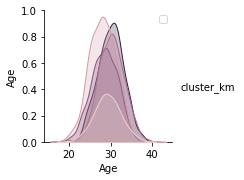

No handles with labels found to put in legend.


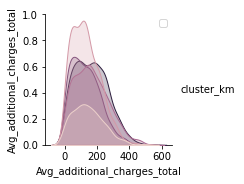

No handles with labels found to put in legend.


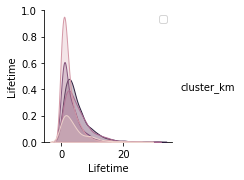

No handles with labels found to put in legend.


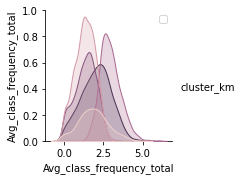

No handles with labels found to put in legend.


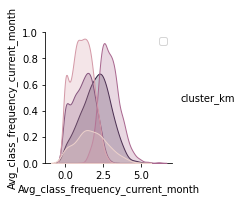

In [29]:
num_val = ['Age', 'Avg_additional_charges_total',  'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


for i in num_val:
    sns.pairplot(data, vars=[i] , hue ='cluster_km')
    plt.legend()
    plt.show()

AttributeError: 'Rectangle' object has no property 'normed'

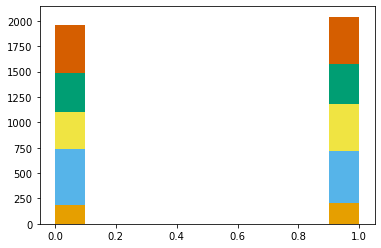

In [36]:
cat_val  = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']


for i in cat_val:
    x1 = list(data[data['cluster_km'] == 0][i])
    x2 = list(data[data['cluster_km'] == 1][i])
    x3 = list(data[data['cluster_km'] == 2][i])
    x4 = list(data[data['cluster_km'] == 3][i])
    x5 = list(data[data['cluster_km'] == 4][i])
    colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
    names = ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4']
    plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names)
    plt.title(i)
    plt.legend()
    plt.show()

In [38]:
list(data[data['cluster_km'] == 0])

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn',
 'cluster_km']

<div class="alert alert-info"> <b>
Conclusion, distributions of features for the clusters.
    
As it was mentioned before, for cluster with highest number of churn avarege age is low, they quit after short perios of time and they do not visit Gym often
</div>

<div class="alert alert-info"> <b>
Conclusion, distributions of discrete variables for the clusters.

- Gender distributed equally for all groups.
- Most of custoemr that located far from gym are in group 2
- Group 0 has more customers that came through partnership, group 3 has more customers with no partnership.
- In general we have less customers that were invited by friends 
- Most of custoemr provided phone number.
- Most of the user prefer to buy 2 month contract. Cluster 3 has more such customers.    
    
</div>

<h3> Churn rate for each cluster </h3>

In [39]:
ratio_clusters = data.groupby('cluster_km', as_index=False)['Churn'].agg(['count', 'sum'])
ratio_clusters['ratio'] = ratio_clusters.apply(lambda x: x['sum'] / x['count'], axis=1)

print(ratio_clusters.sort_values(by='ratio', ascending=False))

            count  sum     ratio
cluster_km                      
1            1067  587  0.550141
3             781  309  0.395647
0             385  103  0.267532
2             831   40  0.048135
4             936   22  0.023504


<div class="alert alert-info"> <b>
Conclusion, Churn rate for each cluster.
    
Biggest cluster is 3 and it has highest rate of churn, almost 50%, also we have cluster 0 that has only 2% of churn!
</div>

<h2> Step 5. General Conclusion </h2>



<a id='Step_5'></a>

<div class="alert alert-info"> <b>
General Conclusion.
    
During this project I worked with data of Gym customers. Recieved dataframe included target value (Churn) and 13 features.

The goal was to analyze this data and find correlation with churn and provide recommendations regarding the strategy for customer interaction and retention. 

1. First step of analyze was building graphs and reviewing mean values of features for two groups (Churn)

It was clear that some features do not correlate much with churn (gender, location, age) and some of them do (spent money, participating in group sessions, frequency of visits).
So we already can say who probably will quit.

2. Second part of project was to train model that will predict in the future whether customer is going to stay or quit.

Accuracy of model is 0.92 which is a good result and such model can be used.

In addition all customers were divided to 5 different groups. Out of this groups I identefied one with lowest churn and one with highest.

3. Recommendations:

 - As we see that average age of people that quit is 25 (probably students) I would recommend to launch some discount program for such category customers.
 - Also it makes sense to attract more customer by "bring a friend" feature.
 - Work with local companies and build more partnership.
 - Perform remote classes (for young ages)

</div>